In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import boxcox
import ipywidgets as widgets
import statsmodels.api as sm
import pip
import itertools 
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.ticker as ticker

In [2]:
#Getting consumer price data from January 2015 to April 2022

df = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', engine = 'openpyxl', index_col = 'Data')
df = df.transpose()
df.head(2)

Data,Margarine,Sour cream,Beef (except boneless meat),"Whole pasteurized drinking milk 2,5-3,2% fat content","Sterilized whole drinking milk 2,5-3,2% fat content",Pork (except boneless meat),Chickens,Lamb (except boneless meat),Chesses hard and soft,Eggs,...,Potatoes,Fresh cabbage,Onions,Carrots,Cucumbers,Tomatoes,Apples,Vodka,Fish,Butter
2015-01-04 00:00:00,89.18,156.790,277.430,43.950,59.85,274.93,137.390,309.250,395.540,60.79,...,28.01,28.72,27.77,32.710,137.920,138.29,80.79,548.160,113.280,360.430
2015-01-11 00:00:00,89.88,157.755,280.045,44.085,60.05,275.88,137.995,310.345,400.355,61.53,...,28.87,30.71,29.07,33.965,150.605,144.19,82.44,548.905,114.295,362.825


In [5]:
#For forecasting SARIMAX model will be used with automatically selected parameters of lags, differences and seasonality.
#Paramateres have been selected with function 'auto_arima' and had saved earlier in a separate sheets of file. This was done due to the inexpediency and energy consumption of running this function every time on the same dataset. 
#Next, getting these parameteres:
df2_1 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=1, engine = 'openpyxl', index_col = 'Data')
df2_1 = df2_1.transpose()
df2_2 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=2, engine = 'openpyxl', index_col = 'Data')
df2_2 = df2_2.transpose()
df2_3 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=3, engine = 'openpyxl', index_col = 'Data')
df2_3 = df2_3.transpose()
df3_1 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=4, engine = 'openpyxl', index_col = 'Data')
df3_1 = df3_1.transpose()
df3_2 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=5, engine = 'openpyxl', index_col = 'Data')
df3_2 = df3_2.transpose()
df3_3 = pd.read_excel(r'C:\Users\Alina\Desktop\Cases\Prices.xlsx', sheet_name=6, engine = 'openpyxl', index_col = 'Data')
df3_3 = df3_3.transpose()

In [7]:
#Forecasting
warnings.filterwarnings("ignore")

spisok_col = sorted(df.columns.astype(str))
SARIMAX = pd.DataFrame()
for a in spisok_col:
    p1 = int(str(df2_1[a])[23])
    p2 = int(str(df2_2[a])[23])
    p3 = int(str(df2_3[a])[23])
    s1 = int(str(df3_1[a])[23])
    s2 = int(str(df3_2[a])[23])
    s3 = int(str(df3_3[a])[23])
    mod = sm.tsa.statespace.SARIMAX(df[a], order=(p1,p2,p3), seasonal_order=(s1,s2,s3, 52))
    results_st = mod.fit()
    pred = results_st.get_prediction() #prediction
    new_SARIMAX = pd.DataFrame({a: pred.predicted_mean})
    SARIMAX = pd.concat([SARIMAX, new_SARIMAX], axis=1)
    print(a)
    print(pred.predicted_mean)

Apples
2015-01-04 00:00:00      0.000000
2015-01-11 00:00:00     80.790130
2015-01-18 00:00:00     83.948541
2015-01-25 00:00:00     85.598595
2015-02-01 00:00:00     88.511839
                          ...    
11.03.2022             107.673692
18.03.2022             111.017371
25.03.2022             116.987698
01.04.2022             121.037463
08.04.2022             124.960816
Name: predicted_mean, Length: 379, dtype: float64
Beef (except boneless meat)
2015-01-04 00:00:00      0.000000
2015-01-11 00:00:00    416.145020
2015-01-18 00:00:00    282.660074
2015-01-25 00:00:00    285.275045
2015-02-01 00:00:00    289.158522
                          ...    
11.03.2022             436.018268
18.03.2022             439.414219
25.03.2022             451.372997
01.04.2022             462.637887
08.04.2022             465.300733
Name: predicted_mean, Length: 379, dtype: float64
Biscuits
2015-01-04 00:00:00      0.000000
2015-01-11 00:00:00    172.365002
2015-01-18 00:00:00    116.310003
2015-0

Onions
2015-01-04 00:00:00     0.000000
2015-01-11 00:00:00    27.770024
2015-01-18 00:00:00    30.220061
2015-01-25 00:00:00    31.439922
2015-02-01 00:00:00    34.051030
                         ...    
11.03.2022             32.634418
18.03.2022             33.747905
25.03.2022             43.360733
01.04.2022             51.147734
08.04.2022             54.079884
Name: predicted_mean, Length: 379, dtype: float64
Pasta
2015-01-04 00:00:00      0.000000
2015-01-11 00:00:00     85.470000
2015-01-18 00:00:00     57.840004
2015-01-25 00:00:00     58.270002
2015-02-01 00:00:00     59.217822
                          ...    
11.03.2022              98.517101
18.03.2022             100.963785
25.03.2022             102.654299
01.04.2022             104.849339
08.04.2022             106.753600
Name: predicted_mean, Length: 379, dtype: float64
Pasta from wheat flour of the highest grade
2015-01-04 00:00:00      0.000000
2015-01-11 00:00:00     84.330000
2015-01-18 00:00:00     57.130001
2015

In [8]:
#Calculating of MAEs
df_true = df.drop(pd.to_datetime('2015-01-04 00:00:00'))
df_fs = SARIMAX.drop(pd.to_datetime('2015-01-04 00:00:00'))
for a in spisok_col:
    err_SARIMAX = mean_absolute_error(df_true[a], df_fs[a])
    print(a)
    print(err_SARIMAX)

Apples
0.387351499819631
Beef (except boneless meat)
0.8119181613245926
Biscuits
0.3475819356430786
Black tea
1.4962953114664013
Boiled sausage
0.9327312018615223
Bread
0.09325761122171462
Buckwheat-kernel groats
0.2996892775452321
Butter
1.1481540288994205
Carrots
0.3422372009463995
Chesses hard and soft
1.1827498151344817
Chickens
0.42265978361596596
Cucumbers
2.306423679000719
Eggs
0.22278532057062114
Fish
0.26228292972393247
Fresh cabbage
0.4524181646179409
Granulated sugar
0.26338527425909647
Lamb (except boneless meat)
0.9839391814317923
Margarine
0.35855370436810474
Millet
0.14916179404447572
Onions
0.2388771842540001
Pasta
0.21482216658549785
Pasta from wheat flour of the highest grade
0.18125472740739582
Pork (except boneless meat)
0.8021411484514561
Potatoes
0.2249056533465471
Rice
0.2091183257702078
Salt
0.04143481581030491
Sausages
0.8481078712406782
Semi-smoked and boiled-smoked sausage
1.1329811903822042
Sour cream
0.45121214768610685
Sterilized whole drinking milk 2,5-3,

In [10]:
#Let's see also on MAPEs - mean absolute percentage errors

for a in spisok_col:
    MAPE = mean_absolute_percentage_error(df_true[a], df_fs[a])
    print(a)
    print(MAPE)

Apples
0.003854445263892833
Beef (except boneless meat)
0.002579415857052318
Biscuits
0.002521006100165829
Black tea
0.0018319676459781606
Boiled sausage
0.002652782402936244
Bread
0.002182305423530524
Buckwheat-kernel groats
0.004076410181226981
Butter
0.0025143087137549274
Carrots
0.008178968132729643
Chesses hard and soft
0.002552227247677529
Chickens
0.002988155713786816
Cucumbers
0.020067473897995385
Eggs
0.0035577276152443283
Fish
0.0016580647282033254
Fresh cabbage
0.013599335048903084
Granulated sugar
0.005364857296695562
Lamb (except boneless meat)
0.002482325968615726
Margarine
0.003103028208621676
Millet
0.002753583267764377
Onions
0.007581809766119678
Pasta
0.0032593980666451956
Pasta from wheat flour of the highest grade
0.002728869712468745
Pork (except boneless meat)
0.0029304001363201914
Potatoes
0.0073059444448792124
Rice
0.0031348053486330747
Salt
0.0032577459349384533
Sausages
0.0025626484136531185
Semi-smoked and boiled-smoked sausage
0.0026515331803962172
Sour crea

In [ ]:
#The results show that the difference between majority of actual and forecast prices are less than 1 RUB or 1%, which is nice. We can trust this model.

(0.0, 378.0)

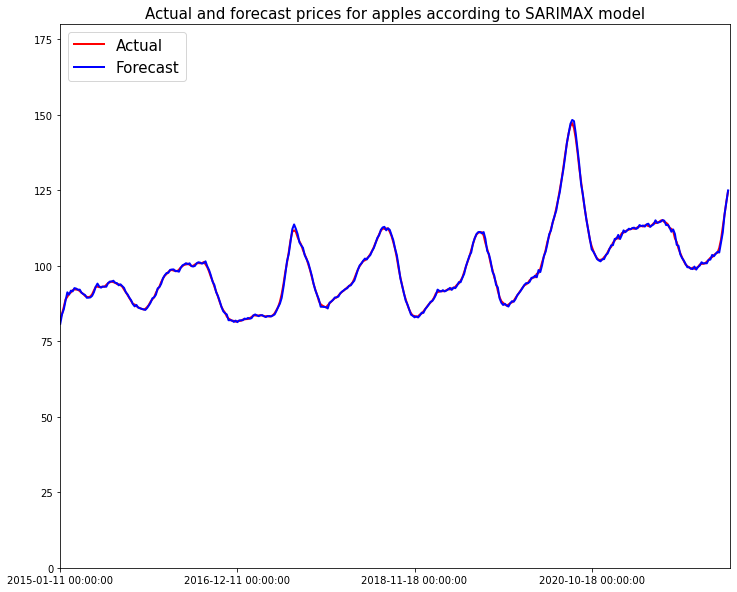

In [20]:
#Let's look at a graph that will clearly show how small a difference on the example of apples prices

plt.figure(figsize=(12, 10))
plt.title('Actual and forecast prices for apples according to SARIMAX model', fontsize=15)

with pd.plotting.plot_params.use("x_compat", True):
    df_true['Apples'].plot(label='Actual', linewidth = 2, color="r")
    df_fs['Apples'].plot(label='Forecast', linewidth = 2, color="b")
plt.legend(loc=2, prop={'size': 15})
plt.locator_params(nbins=8, axis='both')
plt.ylim(0, 180)
plt.xlim(0, 378)

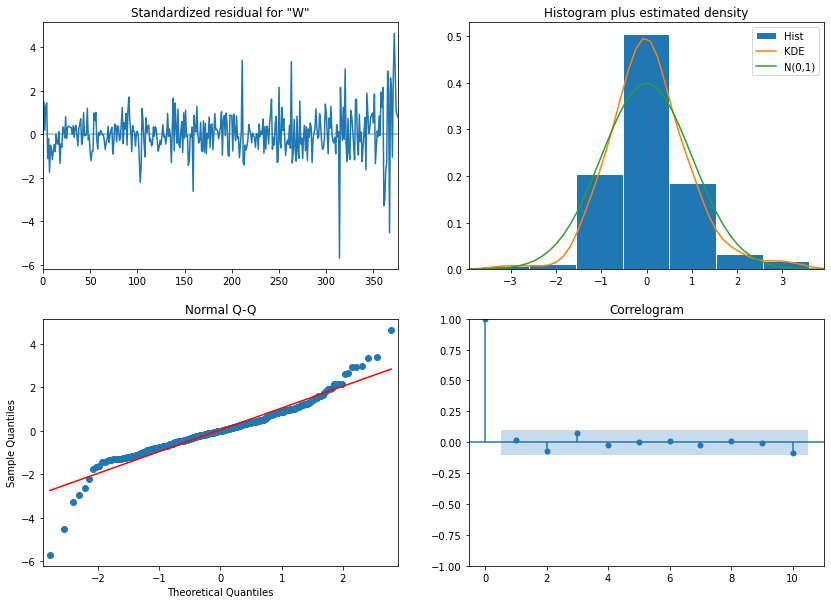

In [19]:
#additional indicators to analyze
results_st.plot_diagnostics(figsize=(14, 10))
plt.show()